<a href="https://colab.research.google.com/github/Ashishnain2004/Ashishnain/blob/main/CodeforPredictingData.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd #pandas is a liberary for dataframes
df=pd.read_csv('/content/song_data - song_data.csv')
df.index=df.iloc[:,0]#choose song name as index of dataframe
df
df=df.drop(['song_name'],axis=1)
df

,song_popularity,song_duration_ms,acousticness,danceability,energy,instrumentalness,key,liveness,loudness,audio_mode,speechiness,tempo,time_signature,audio_valence
song_name,,,,,,,,,,,,,,
Boulevard of Broken Dreams,73,262333,0.005520,0.496,0.682,0.000029,8,0.0589,-4.095,1,0.0294,167.060,4,0.474
In The End,66,216933,0.010300,0.542,0.853,0.000000,3,0.1080,-6.407,0,0.0498,105.256,4,0.370
Seven Nation Army,76,231733,0.008170,0.737,0.463,0.447000,0,0.2550,-7.828,1,0.0792,123.881,4,0.324
By The Way,74,216933,0.026400,0.451,0.970,0.003550,0,0.1020,-4.938,1,0.1070,122.444,4,0.198
How You Remind Me,56,223826,0.000954,0.447,0.766,0.000000,10,0.1130,-5.065,1,0.0313,172.011,4,0.574
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Let It Breathe,60,159645,0.893000,0.500,0.151,0.000065,11,0.1110,-16.107,1,0.0348,113.969,4,0.300
Answers,60,205666,0.765000,0.495,0.161,0.000001,11,0.1050,-14.078,0,0.0301,94.286,4,0.265
Sudden Love (Acoustic),23,182211,0.847000,0.719,0.325,0.000000,0,0.1250,-12.222,1,0.0355,130.534,4,0.286


<Axes: >

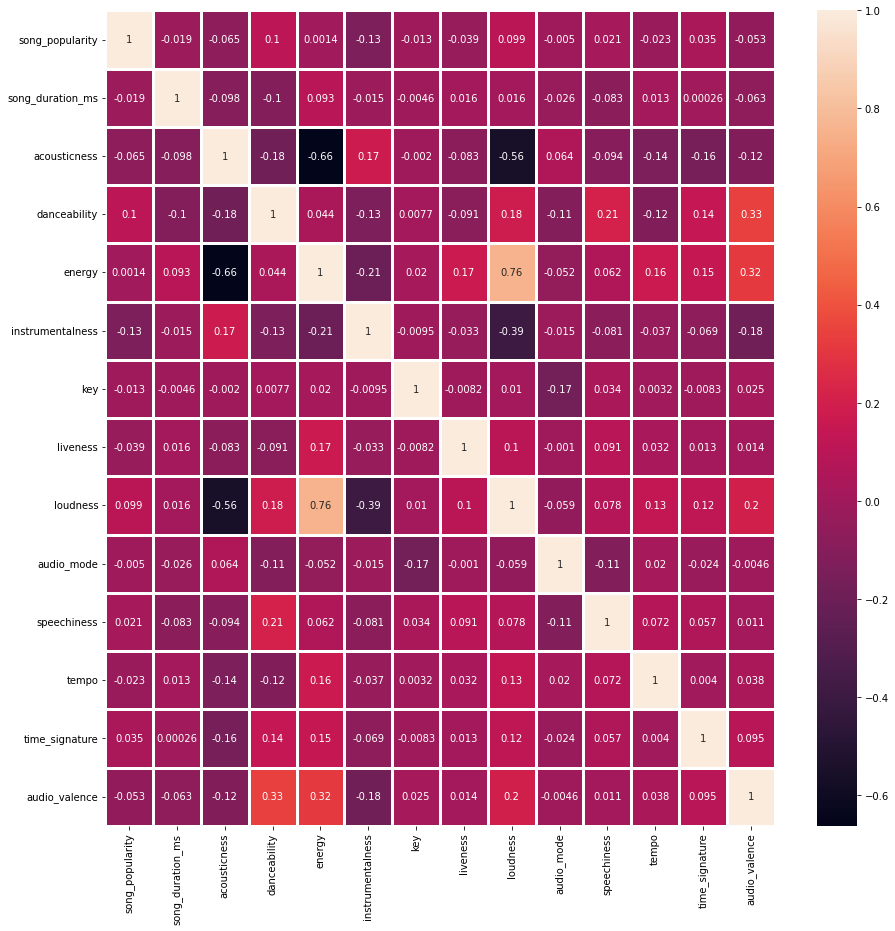

In [5]:
#plot pearson correlation map
import seaborn as sb
import matplotlib.pyplot as plt
plt.figure(figsize=(15,15))
sb.heatmap(df.corr(),annot=True,linewidth=3)

In [13]:
#Select input for predicting song popularity
input=df['danceability']
output=df['song_popularity']
#function prototype
def weights(input,output):
    mean_x=np.mean(input)
    mean_y=np.mean(output)
    #compute theta_1
    theta_1=(np.sum((input-mean_x)*(output-mean_y)))/(np.sum((input-mean_x)**2))
    #compute theta_0
    theta_0=mean_y-theta_1*mean_x
    print("Theta_0 and theta_1 are {} and {} respectively".format(theta_0,theta_1) )
    return[theta_0,theta_1]

In [15]:
import numpy as np
coeff= weights(np.array(input),np.array(output)) #function call to the function de 

Theta_0 and theta_1 are 43.75957444652067 and 14.576980359850886 respectively


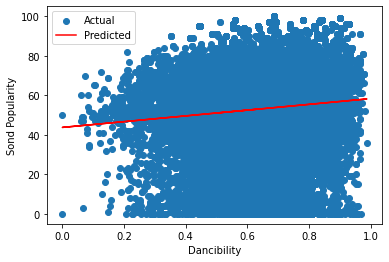

In [21]:
#make predictions on given inpput
y_hat= coeff[0]+input*coeff[1]
plt.scatter(input,output)
plt.plot(inpit,y_hat,color='red')
plt.xlabel('Dancibility')
plt.ylabel('Sond Popularity')
plt.legend(['Actual','Predicted'])

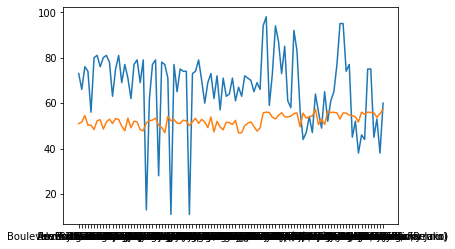

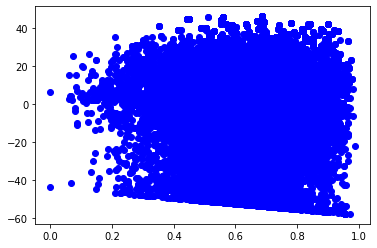

In [23]:
plt.plot(output[:100])
plt.plot(y_hat[:100])
plt.show()
residual=output-y_hat
plt.scatter(input,residual,color='blue')